# Data Preparation

In [2]:
import pandas as pd

data = pd.read_csv('./data/housing.csv', usecols=['longitude', 'latitude', 'median_house_value'])
data.head()

,longitude,latitude,median_house_value
0,-122.23,37.88,452600.0
1,-122.22,37.86,358500.0
2,-122.24,37.85,352100.0
3,-122.25,37.85,341300.0
4,-122.25,37.85,342200.0


# Explore Data

<Axes: xlabel='longitude', ylabel='latitude'>

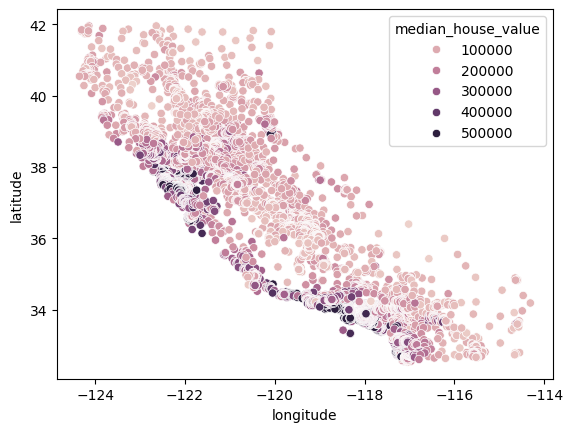

In [4]:
import seaborn as sns

sns.scatterplot(data=data, x='longitude', y='latitude', hue='median_house_value')

# Run K-Means Clustering

In [6]:
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    data[['longitude', 'latitude']],
    data[['median_house_value']],
    test_size=0.3,
    random_state=0
)

x_train_norm = normalize(x_train)
x_test_norm = normalize(x_test)

We don't know how many clusters are needed, so let's start with 3.

In [19]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0, n_init='auto')
kmeans.fit(x_train_norm)

KMeans(n_clusters=3, n_init='auto', random_state=0)

[2 2 1 ... 2 1 1]


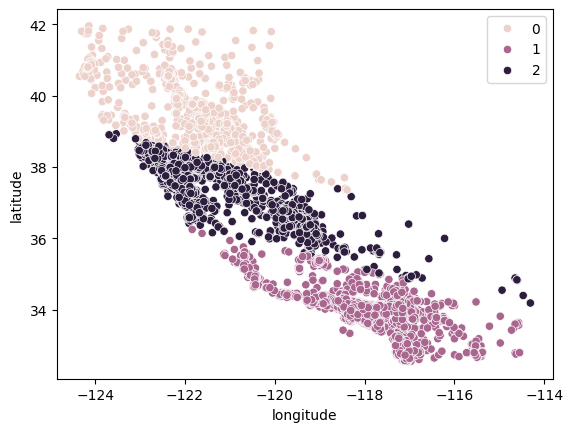

In [20]:
sns.scatterplot(data=x_train, x='longitude', y='latitude', hue=kmeans.labels_)

<Axes: ylabel='median_house_value'>

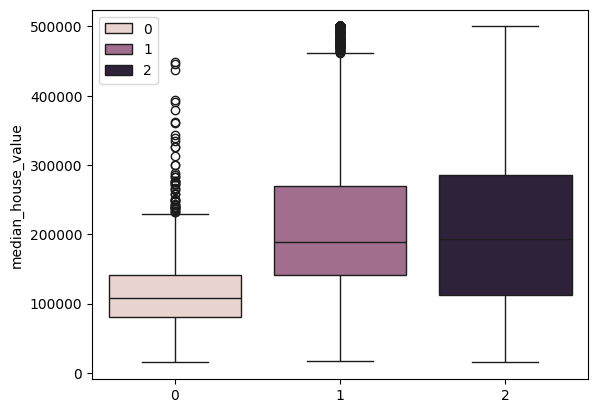

In [24]:
sns.boxplot(x = kmeans.labels_, y = y_train['median_house_value'], hue=kmeans.labels_)

Use Silhouette score to calculate performance.

In [34]:
from sklearn.metrics import silhouette_score

silhouette_score(x_train_norm, kmeans.labels_, metric='euclidean')

0.74914607217508

# Model ensemble
Run K-Means clustering with mulitple configurations and choose the one with lowest cost.

In [27]:
K = range(2, 8)
models = []
costs = []

for k in K:
    model = KMeans(n_clusters=k, random_state=0, n_init='auto').fit(x_train_norm)

    models.append(model)
    costs.append(silhouette_score(x_train_norm, model.labels_, metric='euclidean'))

<Axes: >

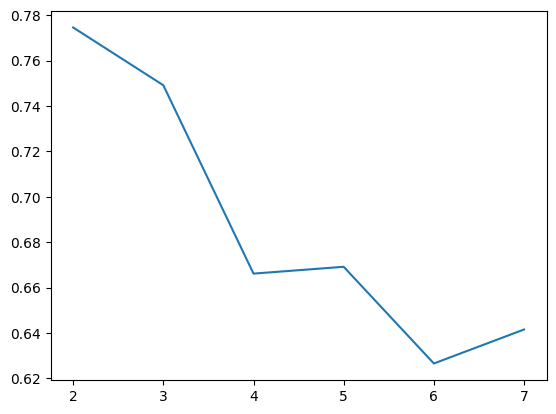

In [28]:
sns.lineplot(x = K, y = costs)

We can see that with 6 clusters, we're able to achieve lowest cost.

<Axes: xlabel='longitude', ylabel='latitude'>

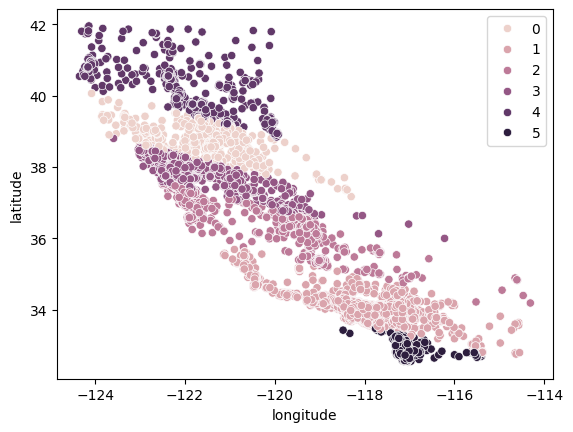

In [35]:
sns.scatterplot(data=x_train, x='longitude', y='latitude', hue=models[4].labels_)

<Axes: ylabel='median_house_value'>

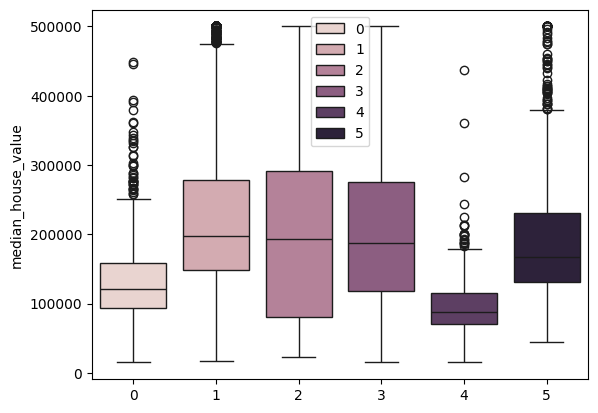

In [37]:
selected_model = models[4]
sns.boxplot(x = selected_model.labels_, y = y_train['median_house_value'], hue=selected_model.labels_)